In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [234]:
df = pd.read_csv("Phishing.csv")
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [236]:
df.shape

(11055, 31)

# Check for duplicates values

In [238]:
df.duplicated().sum()

5206

In [240]:
df.drop_duplicates(inplace = True) # Dropping duplicates

In [242]:
df.duplicated().sum()

0

In [244]:
df.shape

(5849, 31)

# Check for Null values

In [246]:
df.isnull().sum().sum() # No Null values

0

# Check if target is balanced or imbalanced

In [248]:
df["Result"].value_counts() #Class is not imbalanced as they are in ratio of approx 3:2

Result
-1    3019
 1    2830
Name: count, dtype: int64

In [162]:
# Check for SD to see if there is any columns with SD = 0. 

In [250]:
df.describe() # Looks like all the coloumns have fair bit of deviation which is good for model training

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000
mean,0.132843,-0.616003,0.720294,0.588648,0.718242,-0.760301,0.065823,0.149085,-0.305864,0.581809,0.677552,0.653616,0.120875,-0.138485,-0.146863,-0.584544,0.574970,0.678236,0.131817,0.723030,0.901864,0.564028,0.785604,0.021371,0.475124,0.233886,-0.423833,0.661823,0.347752,0.697042,-0.032313
std,0.991222,0.777323,0.693728,0.808459,0.695852,0.649627,0.802448,0.924473,0.952157,0.813395,0.735538,0.756891,0.992753,0.725940,0.769730,0.754880,0.818244,0.734907,0.338321,0.690876,0.432058,0.825826,0.618782,0.999857,0.879994,0.826010,0.905818,0.749725,0.579027,0.717091,0.999563
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
# Visualization of Data

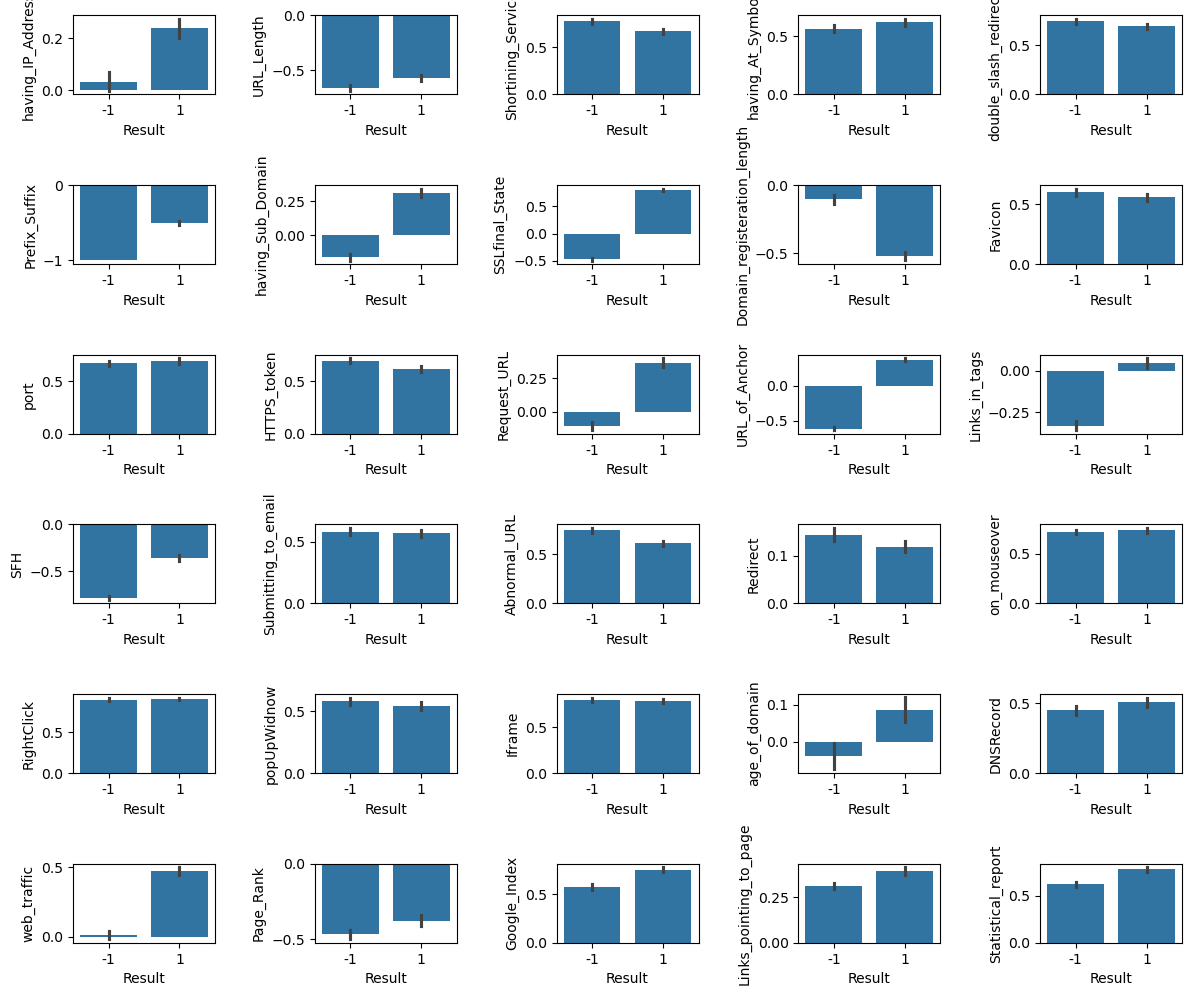

In [386]:
plt.figure(figsize=(12, 13))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(8,5,i+1)
    sns.barplot(df, y = col, x = "Result")
plt.tight_layout(pad=1.0, w_pad=2 , h_pad=3.0)
plt.show()

In [388]:
# Insight - Over all the classes (-1,1) are equally distribted amoung features barring 2 or 3 columns

# Lets find the corelation 

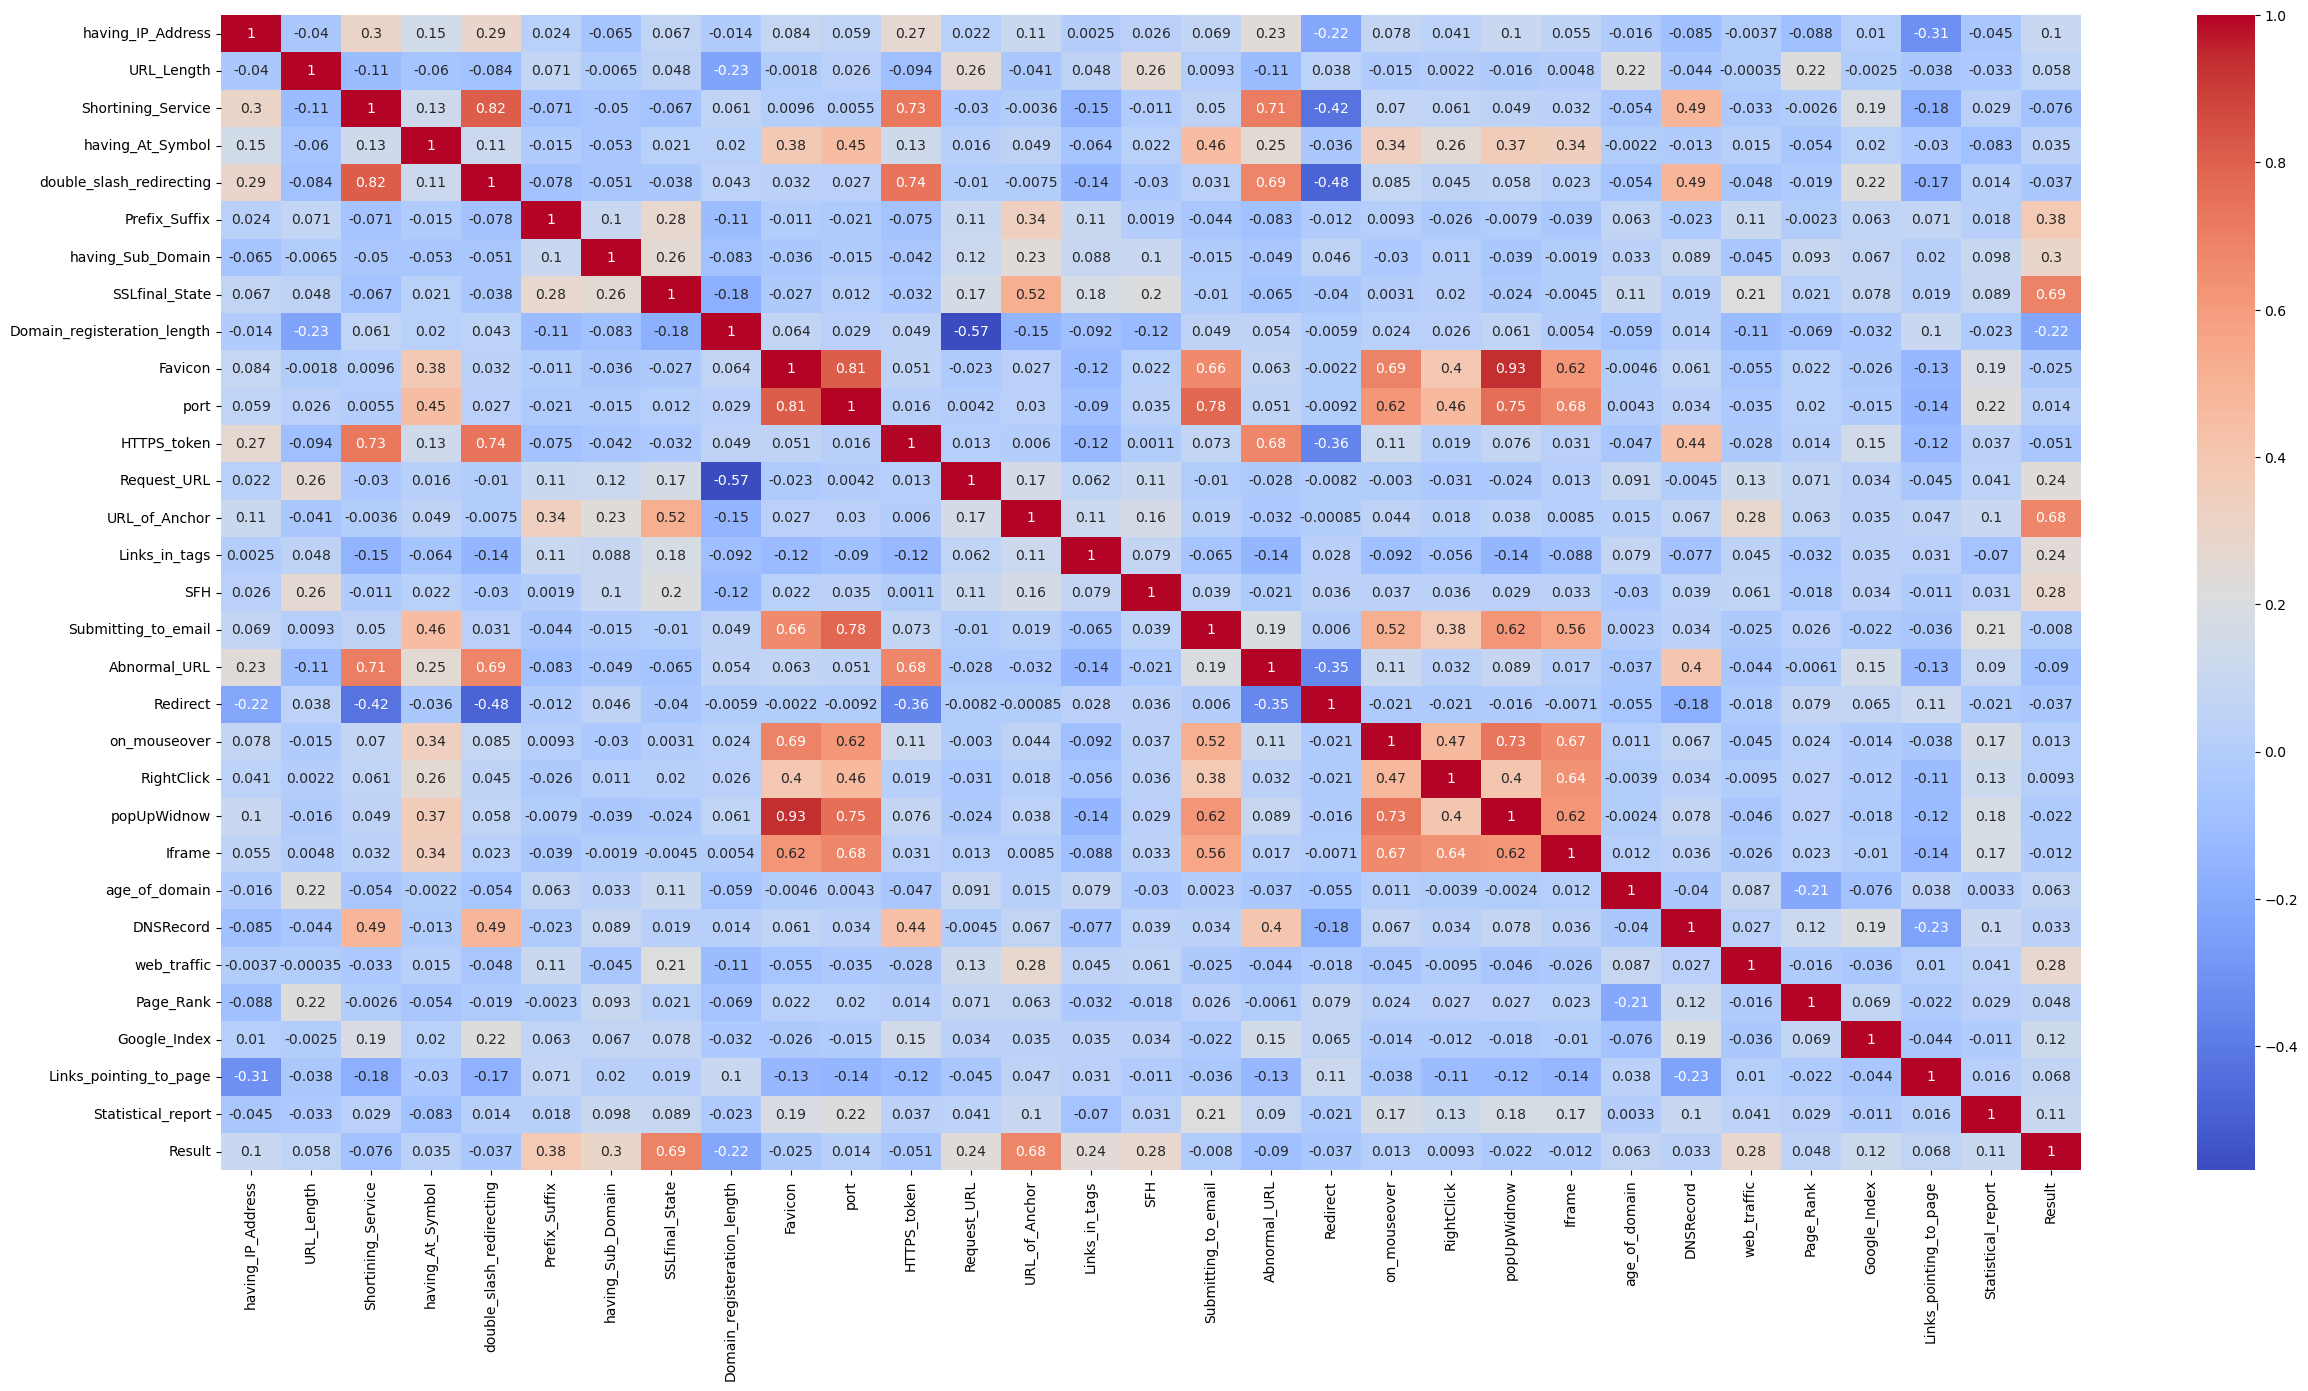

In [426]:
plt.figure(figsize=(30, 15))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",xticklabels='auto',yticklabels='auto')
plt.show()

# Lets get top 20 correlations

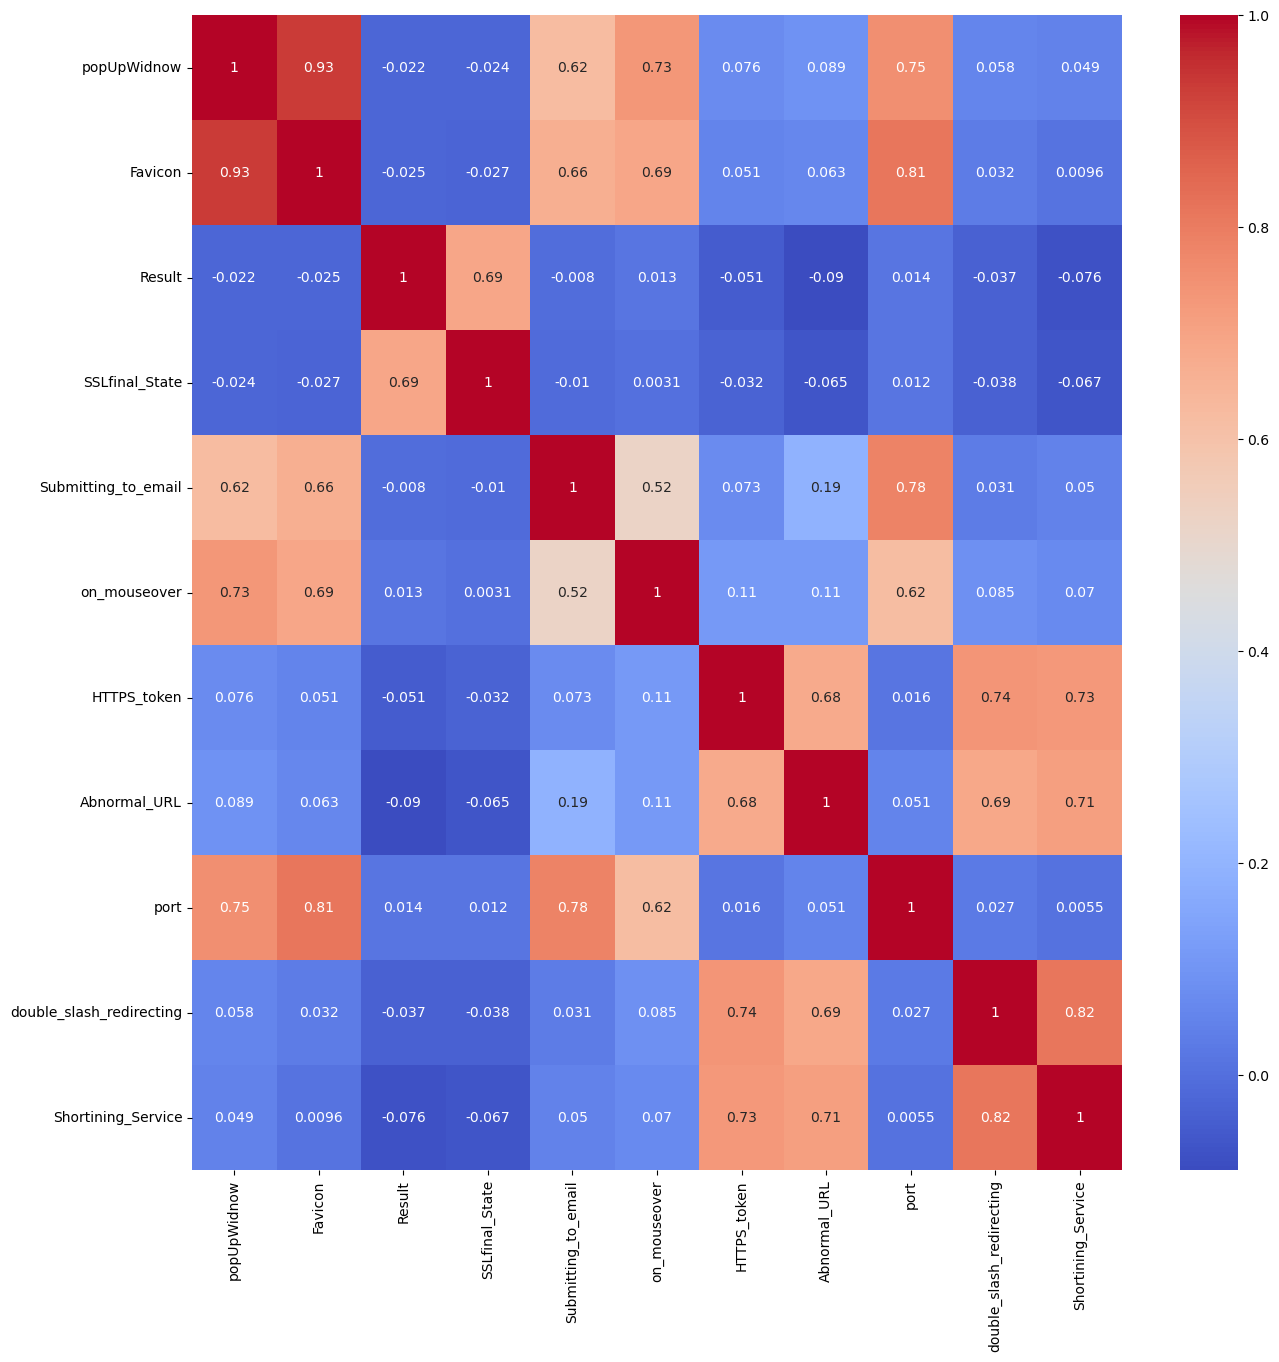

In [527]:
n = 20
correlations = df.corr().unstack().abs().sort_values(ascending=False)
top_correlations = correlations[correlations != 1].head(n)

# Extract corresponding columns
top_columns = list(set([col for pair in top_correlations.index for col in pair]))

# Plot heatmap for top correlated columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[top_columns].corr(), annot=True, cmap="coolwarm")
plt.show()


In [529]:
# Insight. Below columns are co-related. 
# We can keep any one columns among below pair (either Favicon or popUpWidnow ) to reduce the curse of dimensionality.
# Favicon                      popUpWidnow                    0.933145
# popUpWidnow                  Favicon                        0.933145
# double_slash_redirecting     Shortining_Service             0.815809
# Shortining_Service           double_slash_redirecting       0.815809
# Favicon                      port                           0.812657

# Split to x and Y

In [592]:
x = df.drop("Result", axis = 1)
y = df[[df.columns[-1]]]

In [596]:
y.replace({-1: 0}, inplace=True)

# Train test and split

In [625]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 1)

In [633]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4094, 30), (1755, 30), (4094, 1), (1755, 1))

# Model Training

In [648]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [650]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

Scores [92.55189255 91.08669109 93.28449328 92.06349206 91.68704156]
Mean Score 0.9213472211027224
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2103
           1       0.91      0.93      0.92      1991

    accuracy                           0.92      4094
   macro avg       0.92      0.92      0.92      4094
weighted avg       0.92      0.92      0.92      4094

 fpr [0.         0.08273894 1.        ], tpr [0.         0.92717228 1.        ], threshold [inf  1.  0.]
AUC Score 0.9222166654366905
Model Score 0.9222166654366905
Accuracy score of LogisticRegressionCV() is 92.22166654366904


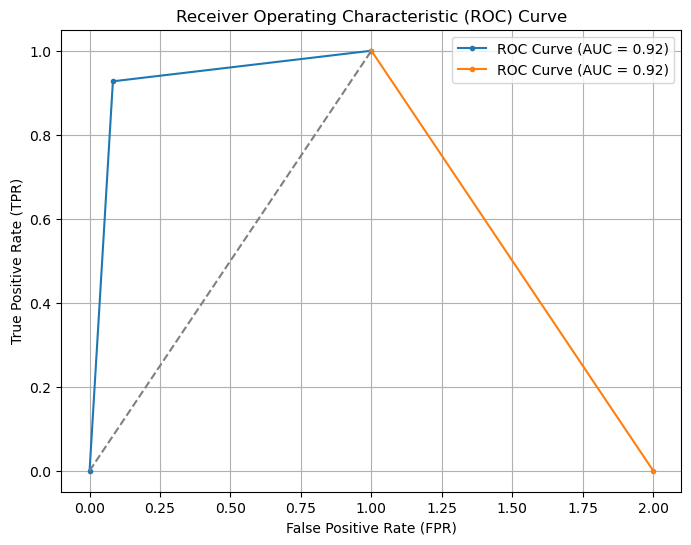

***********************************
Scores [93.52869353 93.04029304 94.26129426 94.13919414 93.15403423]
Mean Score 0.9362470183986076
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2103
           1       0.93      0.96      0.94      1991

    accuracy                           0.95      4094
   macro avg       0.95      0.95      0.95      4094
weighted avg       0.95      0.95      0.95      4094

 fpr [0.         0.06514503 1.        ], tpr [0.         0.95730789 1.        ], threshold [inf  1.  0.]
AUC Score 0.9460814272882273
Model Score 0.9460814272882273
Accuracy score of SVC() is 94.60814272882273


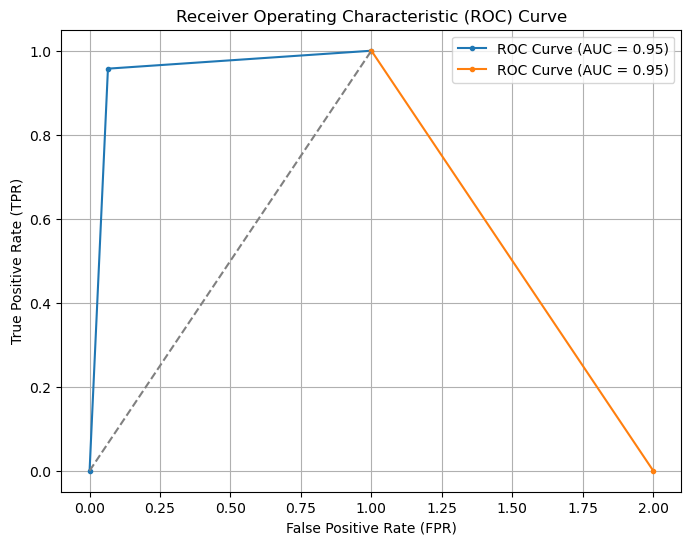

***********************************
Scores [92.18559219 91.20879121 93.16239316 92.7960928  91.68704156]
Mean Score 0.9220798218353231
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2103
           1       0.91      0.93      0.92      1991

    accuracy                           0.92      4094
   macro avg       0.92      0.92      0.92      4094
weighted avg       0.92      0.92      0.92      4094

 fpr [0.         0.08464099 1.        ], tpr [0.         0.93119036 1.        ], threshold [inf  1.  0.]
AUC Score 0.9232746837707392
Model Score 0.9232746837707392
Accuracy score of LinearSVC() is 92.32746837707391


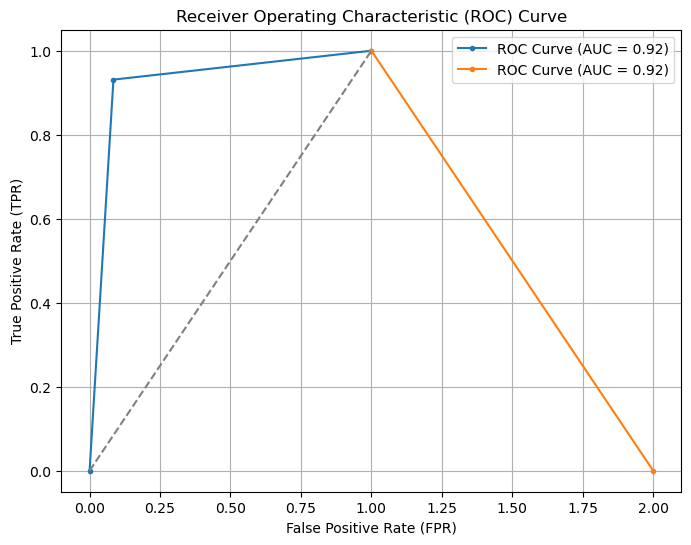

***********************************
Scores [95.23809524 94.87179487 94.99389499 94.26129426 93.39853301]
Mean Score 0.9455272247448286
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2103
           1       0.99      0.99      0.99      1991

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094

 fpr [0.         0.00808369 1.        ], tpr [0.        0.9924661 1.       ], threshold [inf  1.  0.]
AUC Score 0.9921912037358794
Model Score 0.9921912037358794
Accuracy score of RandomForestClassifier() is 99.21912037358794


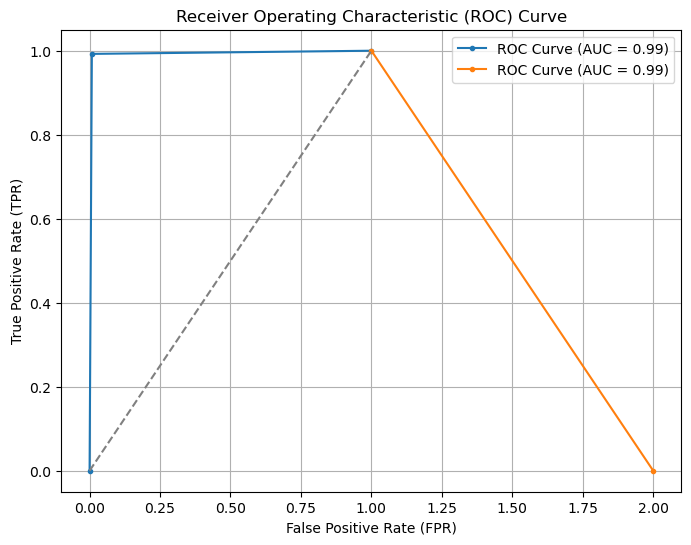

***********************************
Scores [93.52869353 92.18559219 93.16239316 94.01709402 93.39853301]
Mean Score 0.9325846118022157
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2103
           1       0.92      0.94      0.93      1991

    accuracy                           0.94      4094
   macro avg       0.94      0.94      0.94      4094
weighted avg       0.94      0.94      0.94      4094

 fpr [0.         0.07275321 1.        ], tpr [0.         0.94424912 1.        ], threshold [inf  1.  0.]
AUC Score 0.9357479556721365
Model Score 0.9357479556721365
Accuracy score of AdaBoostClassifier() is 93.57479556721366


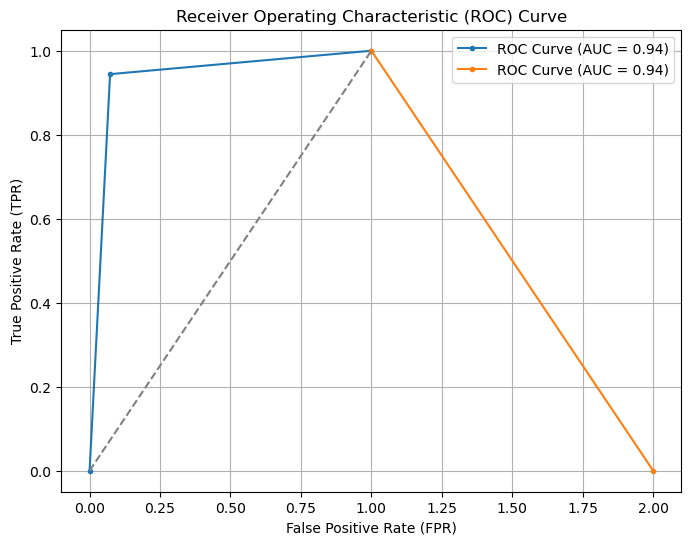

***********************************
Scores [95.11599512 94.01709402 95.72649573 93.89499389 94.13202934]
Mean Score 0.9457732161888641
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2103
           1       0.94      0.96      0.95      1991

    accuracy                           0.95      4094
   macro avg       0.95      0.95      0.95      4094
weighted avg       0.95      0.95      0.95      4094

 fpr [0.         0.05325725 1.        ], tpr [0.         0.95881467 1.        ], threshold [inf  1.  0.]
AUC Score 0.9527787072257875
Model Score 0.9527787072257875
Accuracy score of GradientBoostingClassifier() is 95.27787072257875


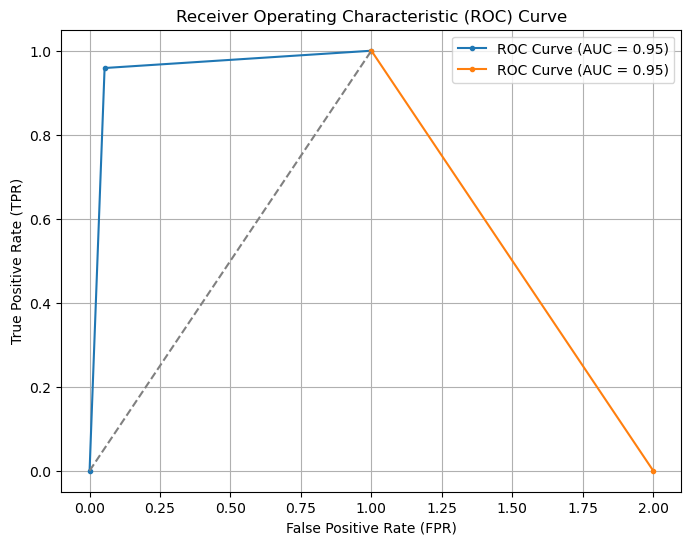

***********************************
Scores [95.6043956  95.48229548 94.99389499 94.38339438 94.00977995]
Mean Score 0.9489475208301613
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2103
           1       0.99      0.99      0.99      1991

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094

 fpr [0.         0.01093676 1.        ], tpr [0.         0.98593672 1.        ], threshold [inf  1.  0.]
AUC Score 0.9874999791023468
Model Score 0.9874999791023468
Accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
           

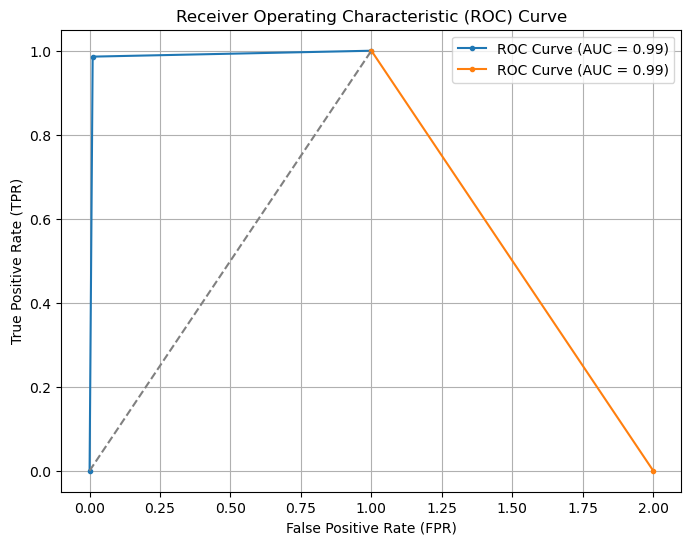

***********************************
Scores [92.67399267 93.04029304 91.81929182 92.30769231 91.07579462]
Mean Score 0.9218341289245935
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2103
           1       1.00      0.98      0.99      1991

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094

 fpr [0. 0. 1.], tpr [0.         0.98392767 1.        ], threshold [inf  1.  0.]
AUC Score 0.9919638372677047
Model Score 0.9919638372677047
Accuracy score of DecisionTreeClassifier() is 99.19638372677046


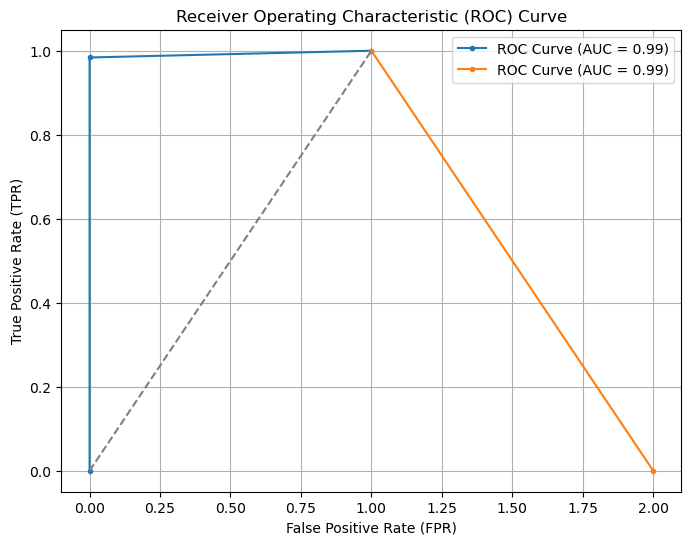

***********************************
Scores [66.05616606 65.81196581 66.66666667 65.56776557 65.40342298]
Mean Score 0.6590119741708984
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2103
           1       1.00      0.30      0.46      1991

    accuracy                           0.66      4094
   macro avg       0.80      0.65      0.61      4094
weighted avg       0.79      0.66      0.61      4094

 fpr [0.00000000e+00 9.51022349e-04 1.00000000e+00], tpr [0.        0.2988448 1.       ], threshold [inf  1.  0.]
AUC Score 0.6489468896291036
Model Score 0.6489468896291036
Accuracy score of GaussianNB() is 64.89468896291037


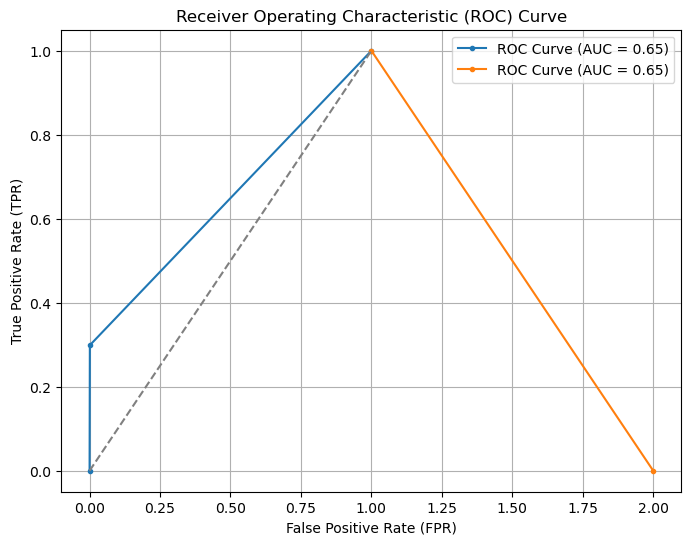

***********************************
Model with highest accuracy is -> 99.21912037358794. Model name is RFC


In [658]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    print(classification_report(y_train,y_pred))
    fpr, tpr, thresholds = roc_curve(y_train,y_pred)
    auc_score = roc_auc_score(y_train,y_pred)
    model_score = accuracy_score(y_train,y_pred)
    print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    print("*"*35)
print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")